# RATINGS PREDICTION

problem statement:

We have a client who has a website where people write different reviews for technical products. 
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) 
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the 
past and they don’t have a rating. So, we have to build an application which can predict the rating 
by seeing the review.


Data Collection Phase 
You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. 
more the data better the model
In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart 
watches, Professional Cameras, Printers, Monitors, Home theater, Router from different ecommerce websites.

Basically, we need these columns

1) reviews of the product.
2) rating of the product.
You can fetch other data as well, if you think data can be useful or can help in the project. It 
completely depends on your imagination or assumption.

Hint:

• Try to fetch data from different websites. If data is from different websites, it will help our 
model to remove the effect of over fitting.
• Try to fetch an equal number of reviews for each rating, for example if you are fetching
10000 reviews then all ratings 1,2,3,4,5 should be 2000. It will balance our data set.
• Convert all the ratings to their round number, as there are only 5 options for rating i.e., 
1,2,3,4,5. If a rating is 4.5 convert it 5.

Model Building Phase

After collecting the data, you need to build a machine learning model. Before model building do 
all data preprocessing steps involving NLP. Try different models with different hyper parameters 
and select the best model.

Follow the complete life cycle of data science. Include all the steps like

1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the best mode

In [1]:
#lets first install the selenium library
!pip install selenium

In [2]:
#import all the required libraries
import pandas as pd
import selenium
from selenium import webdriver
import time
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url = "https://www.flipkart.com/oppo-reno6-pro-5g-stellar-black-256-gb/product-reviews/itm105fdede3d67b?pid=MOBG4GGZF8YEQQGK&lid=LSTMOBG4GGZF8YEQQGKOKSCLW&marketplace=FLIPKART"
driver.get(url)

time.sleep(2)

# Creating empty list
Rating=[]
review=[]
fullreview=[]
days=[]
like=[]
dislike=[]
name=[]

time.sleep(4)
#Taking 10 pages into consideration using for loop
for i in range(20):
    url=driver.find_element_by_xpath("//a[@class='ge-49M']").get_attribute('href')
    driver.get(url)
    #for scrapping the number of stars
    for j in driver.find_elements_by_xpath("//div[@class='_3LWZlK _1BLPMq']"):
        Rating.append(j.text)
    #for scrapping the short review
    for k in driver.find_elements_by_xpath("//p[@class='_2-N8zT']"):
        review.append(k.text)
    #for scrapping the short review
    for p in driver.find_elements_by_xpath("//div[@class='t-ZTKy']"):
        fullreview.append(p.text)
    #for scrapping the review days
    for l in driver.find_elements_by_xpath("//p[@class='_2sc7ZR']"):
        days.append(l.text)
    #for scrapping the comment likes
    for m in driver.find_elements_by_xpath("//div[@class='_27aTsS']/div[1]"):
        like.append(m.text)
    #for scrapping the comment dislikes
    for n in driver.find_elements_by_xpath("//div[@class='_27aTsS']/div[2]"):
        dislike.append(n.text)
    #for scrapping the reviewer name
    for o in driver.find_elements_by_xpath("//p[@class='_2sc7ZR _2V5EHH']"):
        name.append(o.text)

In [4]:
print(len(Rating),len(review),len(fullreview),len(days),len(like),len(dislike),len(name))  

200 200 200 200 200 200 200


In [5]:
#Combining all the lists into a single dataframe
df=pd.DataFrame({"customer_rating":Rating,
                 "customer_review":review,
                 "customer_full_review":fullreview,
                 "review_days":days,
                 "customer_like":like,
                 "customer_dislike":dislike,
                 "customer_name":name})
df

customer_rating      customer_review  \
0                 3                 Nice   
1                 5            Wonderful   
2                 5             Terrific   
3                 4      Worth the money   
4                 5            Must buy!   
..              ...                  ...   
195               5    Worth every penny   
196               5             Terrific   
197               5  Best in the market!   
198               5            Just wow!   
199               5            Excellent   

                                  customer_full_review  review_days  \
0    Completely unsatisfied as I had many expectati...   5 days ago   
1    Excellent phone at this price. Performance of ...  14 days ago   
2    Excellent camera with excellent design. Very s...  14 days ago   
3    Love the pace at which this mobile charges. Ju...   6 days ago   
4    Awesome mobile. design is very gorgeous all th...   5 days ago   
..                                                 ...          ...   
195  Awaaaaasome and stylish. battery back-up very ...   7 days ago   
196  After using 10 days my self opinion is good fa...  11 days ago   
197  I strongly recommend to buy this phone for tho...  12 days ago   
198  My #Bestchoice oppo reno 6 pro\nIts deliver to...  12 days ago   
199  Worth every penny... superb ui and camera .. s...  15 days ago   

    customer_like customer_dislike           customer_name  
0               8                1       Flipkart Customer  
1              14                3       Rana Prathap Pyla  
2              17                5          Rekha Deshmukh  
3               3                0       Flipkart Customer  
4               6                2   Mohammad Rahamatullah  
..            ...              ...                     ...  
195            26                6           BASHARAT GULL  
196            21               15     Mani varma Siluguri  
197            54               22           G Banu Prasad  
198            20                4            Gaurav Kumar  
199            23                6  Yadvendra singh Panwar  

[200 rows x 7 columns]

In [6]:
df.to_csv(r'E:\review.csv',index=False)

# similarlly

SCRAPPING MADE FOR MOBILE,SPEAKERS,LAPTOP,HEADPHONES,WATCHES AND HOME THEATERS ETX...

In [7]:
df=pd.read_csv("review.csv")
df

customer_rating                      customer_review  \
0                   5                    Worth every penny   
1                   5                             Terrific   
2                   4                      Worth the money   
3                   5                    Terrific purchase   
4                   3                                 Nice   
...               ...                                  ...   
5130                5                              Awesome   
5131                5                Mind-blowing purchase   
5132                5                    Worth every penny   
5133                5  Overall great shopping experience:)   
5134                5                   Highly recommended   

                                   customer_full_review    review_days  \
0     Awaaaaasome and stylish. battery back-up very ...     4 days ago   
1     Excellent camera with excellent design. Very s...    11 days ago   
2     Love the pace at which this mobile charges. Ju...     3 days ago   
3     My review\n\nPros\n\ndisplay ( Amoled display ...    10 days ago   
4     Completely unsatisfied as I had many expectati...     2 days ago   
...                                                 ...            ...   
5130  Very very good product.. i m full satisfied wi...   8 months ago   
5131  One of the best watches to have for our fast p...  11 months ago   
5132  Superb quality and nice finishing . It's such ...   7 months ago   
5133  Superb design watch. Looks very classy. I wish...  11 months ago   
5134  I really loved this smartwatch, I am sharing m...  11 months ago   

      customer_like  customer_dislike           customer_name  
0                 6                 0           BASHARAT GULL  
1                 9                 2          Rekha Deshmukh  
2                 3                 0       Flipkart Customer  
3                 4                 2      reddappa yadavalli  
4                 0                 0       Flipkart Customer  
...             ...               ...                     ...  
5130             17                 7   Narayan Singh Rathore  
5131              2                 0    Shivkumar Srivastava  
5132              3                 2             Anurag Giri  
5133              3                 4                    Renu  
5134              2                 2  Tanayraj Singh Chouhan  

[5135 rows x 7 columns]

In [22]:
df.shape

(5135, 7)

In [26]:
df.isnull().sum()

customer_rating         0
customer_review         0
customer_full_review    0
review_days             0
customer_like           0
customer_dislike        0
customer_name           0
dtype: int64

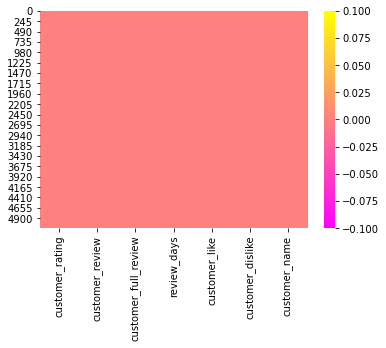

In [28]:
sns.heatmap(df.isnull(),cmap='spring')

In [29]:
df.columns

Index(['customer_rating', 'customer_review', 'customer_full_review',
       'review_days', 'customer_like', 'customer_dislike', 'customer_name'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5135 entries, 0 to 5134
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_rating       5135 non-null   int64 
 1   customer_review       5135 non-null   object
 2   customer_full_review  5135 non-null   object
 3   review_days           5135 non-null   object
 4   customer_like         5135 non-null   int64 
 5   customer_dislike      5135 non-null   int64 
 6   customer_name         5135 non-null   object
dtypes: int64(3), object(4)
memory usage: 280.9+ KB


In [31]:
df.describe()

customer_rating  customer_like  customer_dislike
count      5135.000000    5135.000000       5135.000000
mean          4.684129     205.594547         47.231743
std           0.563750     606.120768        128.183663
min           3.000000       0.000000          0.000000
25%           4.000000       6.000000          1.000000
50%           5.000000      17.000000          4.000000
75%           5.000000     114.000000         28.000000
max           5.000000    5759.000000       1219.000000

In [32]:
df["customer_rating"].value_counts()

5    3774
4    1100
3     261
Name: customer_rating, dtype: int64

# this scrapped data is uploaded in google colab and it will be continued there

# Exploratory data analysis only performed here

customer rating split up and count for each

In [33]:
sns.countplot(x='customer_rating',data=df)

customer liked the comment and the count is below

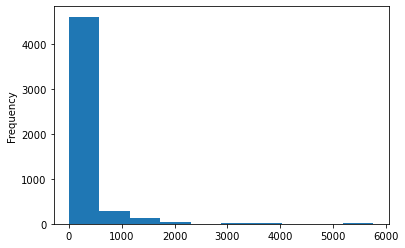

In [34]:
df['customer_like'].plot.hist()

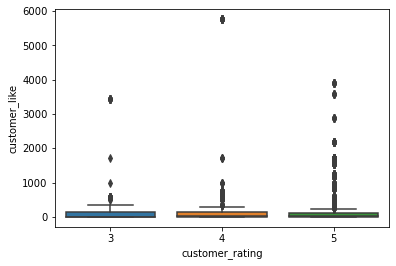

In [35]:
sns.boxplot(x='customer_rating',y='customer_like',data=df)

customer disliked the comment and the count is below

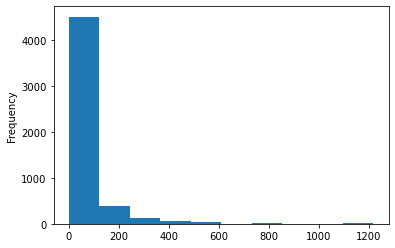

In [36]:
df['customer_dislike'].plot.hist()

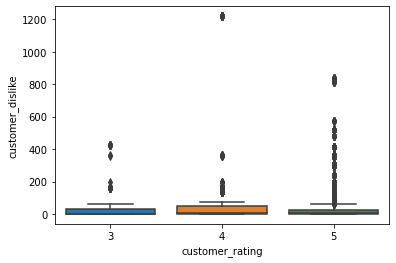

In [37]:
sns.boxplot(x='customer_rating',y='customer_dislike',data=df)

# Correlation heatmap

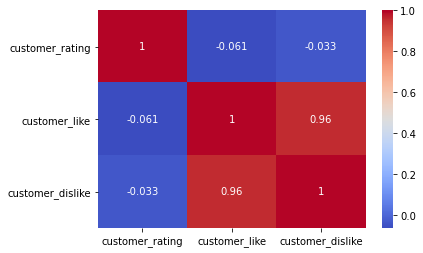

In [39]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')